# Introduction to Statistical Thinking in Python

### Learning Goals
* Gain a big-picture understanding of how we thinkg about the mathematical relationship between two variables
* Gain an intution for how this looks in Python
* Prepare for working in Pandas yourself
* Learn the powerful groupby function in Pandas to summarize real data

# Part 1: Summarizing Numerical Data

How do we summarize numerical data? You need two numbers to summarize data: mean and standard deviation.

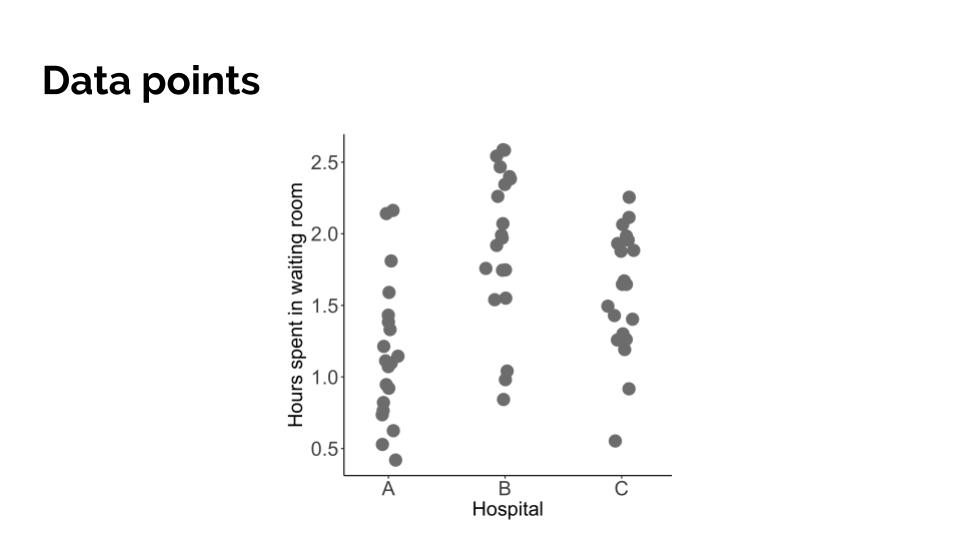
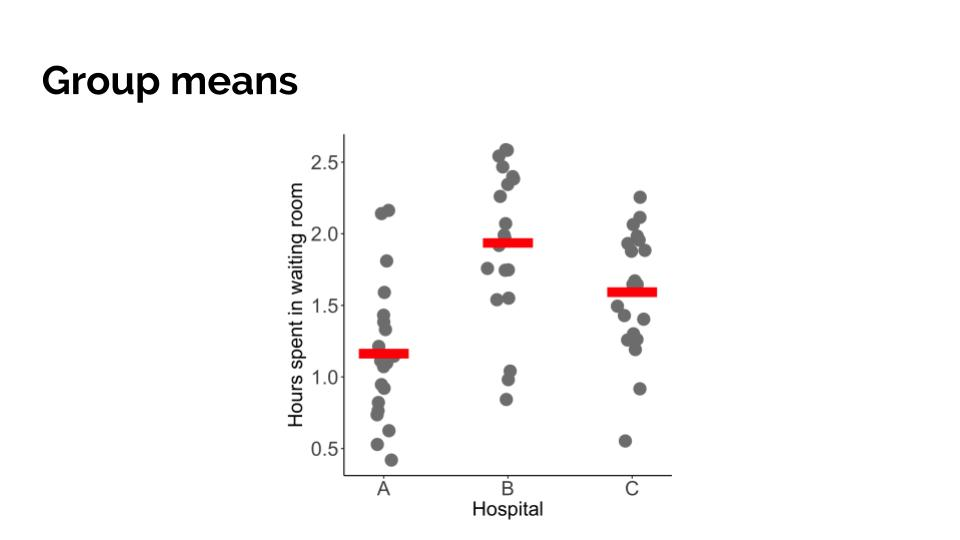
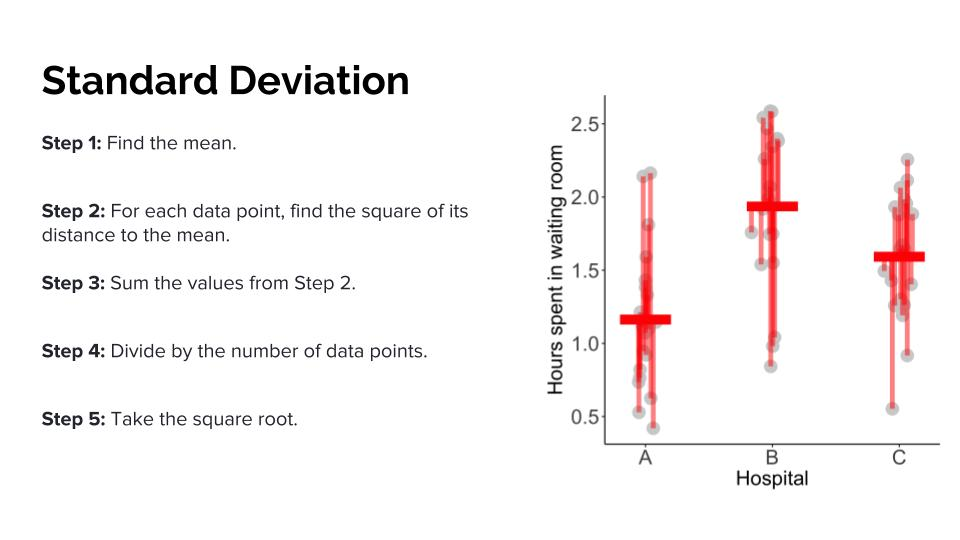
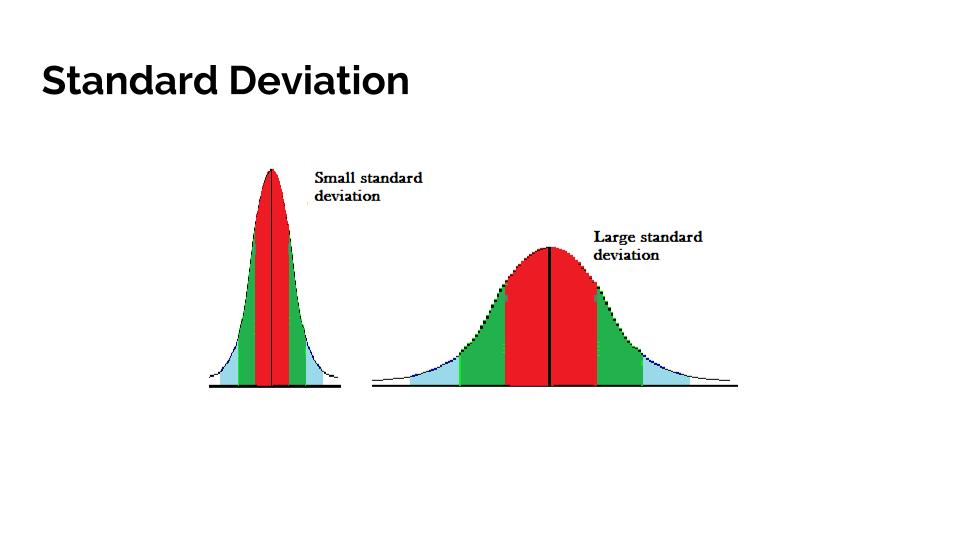

# Part 1: Visualizing the relationship between two variables
Twitter just upped their character quota from 140 to 280. My question: how many characters per sentence? Obviously we can simply count the number of characters over a large number of sentences and then average it. But what is a sentence? Can we answer this question without dividing a text into sentences?

I will do so by looking at the relationship between two variables in a sample text: the number of characters in a chapter and the number of periods (the full stop punctuation).

In [1]:
#import necessary libraries
#I'll use numpy in an example, but we won't go deeper into this library
import pandas
import numpy as np
import csv

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#Reminder: Computers are really fast at math!
2 + 3

5

In [3]:
2 * 3

6

In [4]:
1 + 2 * (3 * 4 * 5 // 6) ** 3 + 7 + 8 - 9 + 10

2017

In [5]:
#read our data into Python using the Pandas library
t = pandas.read_csv('../data/little_women_chapters.csv')
t

,Chapter,Periods,Characters
0,1,189,21759
1,2,188,22148
2,3,231,20558
3,4,195,25526
4,5,255,23395
5,6,140,14622
6,7,131,14431
7,8,214,22476
8,9,337,33767
9,10,185,18508


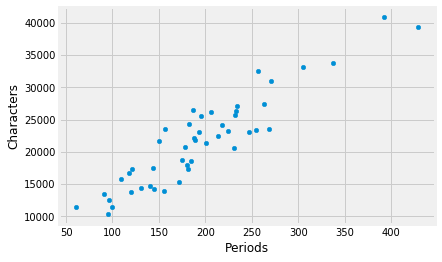

In [6]:
#visualize the relationship between the number of periods in a chapter and the number of characters
#What does this graph tell you?
t.plot.scatter(1, 2)

In [7]:
#Draw a line that approximates the mathematical relationship between two variables
#Reminder: how do we define a line between two points?

def draw_line(a, b):
    x = np.array([50, 450])
    y = a * x + b
    
    t.plot.scatter(1, 2)
    plots.plot(x, y)

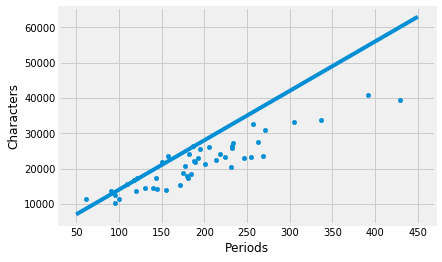

In [8]:
draw_line(140, 0)

In [9]:
#How do we understand how well the line "fits" the data?
#Maybe by looking at how far each point is from that line.
#We can draw the lines in to help us visualize it

def draw_line(a, b):
    x = np.array([50, 450])
    y = a * x + b
    
    t.plot.scatter(1, 2)
    plots.plot(x, y)
    
    for _, row in t.iterrows():
        plots.plot([row.Periods, row.Periods], [row.Characters, a * row.Periods + b], color='r', lw=0.5)

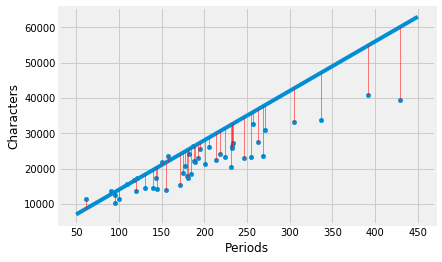

In [10]:
draw_line(140, 0)

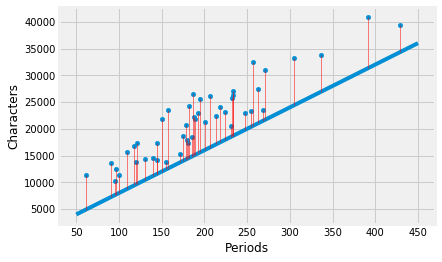

In [11]:
#Looks to me like the slope is too great. 
#How do I know this?

#Try a smaller slope.

draw_line(80, 0)

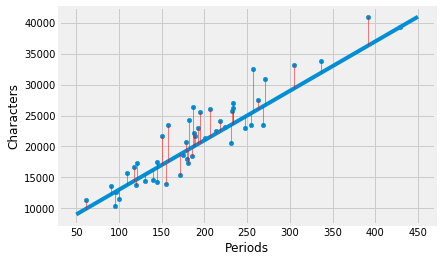

In [12]:
#Slope looks better, but the entire line is too low
#How do I know this?
#Raise the line

draw_line(80, 5000)

In [13]:
#Looking is one thing, but how do I mathematically define the fit of the line to the data?
#One was is taking the average squared difference between the point and the line
def average_squared_distance(a, b):
    x = t['Periods']
    y = t['Characters']
    fitted = a * x + b
    return np.average((y - fitted) ** 2) / 1e6

In [14]:
average_squared_distance(140, 0)

54.081190936170216

In [15]:
average_squared_distance(80, 0)

44.82963008510638

In [16]:
average_squared_distance(80, 5000)

8.7883534893617021

In [18]:
#Insert hypothetical fuction to determine which numbers minimize the average squared distance
#The function would output the slope and intersect for the line that minimizes this difference

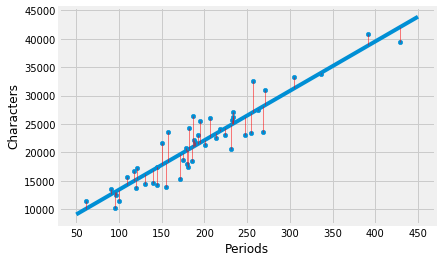

In [17]:
#This is what the funtion would tell us
draw_line(86.97784106,  4744.78483438)

What have we learned about the relationship between the number of periods and number of characters?

Summarize what we have learned, but also tell me mathematically.

# Part 3: Working with Real Data!

We'll focus on the numerical column 'score', and think through different ways of summarizing and visualizing it.

In [19]:
df = pandas.read_csv("../data/BDHSI2016_music_reviews.csv", sep = '\t')
df

,album,artist,genre,release_date,critic,score,body
0,Don't Panic,All Time Low,Pop/Rock,2012-10-09 00:00:00,Kerrang!,74.0,While For Baltimore proves they can still writ...
1,Fear and Saturday Night,Ryan Bingham,Country,2015-01-20 00:00:00,Uncut,70.0,There's nothing fake about the purgatorial nar...
2,The Way I'm Livin',Lee Ann Womack,Country,2014-09-23 00:00:00,Q Magazine,84.0,All life's disastrous lows are here on a caree...
3,Doris,Earl Sweatshirt,Rap,2013-08-20 00:00:00,Pitchfork,82.0,"With Doris, Odd Future’s Odysseus is finally b..."
4,Giraffe,Echoboy,Rock,2003-02-25 00:00:00,AllMusic,71.0,Though Giraffe is definitely Echoboy's most im...
5,Weathervanes,Freelance Whales,Indie,2010-04-13 00:00:00,Q Magazine,68.0,Fans of Owl City and The Postal Service will r...
6,Build a Rocket Boys!,Elbow,Pop/Rock,2011-04-12 00:00:00,Delusions of Adequacy,82.0,"Whereas previous Elbow records set a mood, Bui..."
7,Ambivalence Avenue,Bibio,Indie,2009-06-23 00:00:00,Q Magazine,78.0,His remarkable Warp debut follows a series of ...
8,Wavvves,Wavves,Indie,2009-03-17 00:00:00,PopMatters,68.0,"There’s an energy coursing through this, and r..."
9,Peachtree Road,Elton John,Rock,2004-11-09 00:00:00,MelD.,70.0,Classic. Songs filled with soul. Lyrics refres...


In [20]:
####Exercise 1: Summarize your data
df.describe()

,score
count,5001.000000
mean,72.684223
std,8.714896
min,7.400000
25%,68.000000
50%,74.000000
75%,79.000000
max,100.000000


In [21]:
#To summarize non-numeric columns use the value_counts() function
df['genre'].value_counts()

Pop/Rock                  1486
Indie                     1115
Rock                       932
Electronic                 513
Rap                        363
Pop                        149
Country                    140
R&B;                       112
Folk                        70
Alternative/Indie Rock      42
Dance                       41
Jazz                        38
Name: genre, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1151d59b0>]], dtype=object)

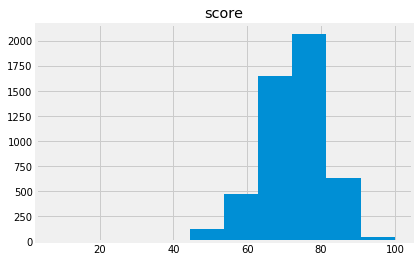

In [22]:
#Next: visualize it using a histogram
#This is good practice whenever working with data. Before you do anything, visualize it!
#What did we learn?
df.hist()

In [23]:
#There are different genres in the data. Perhaps the average score is different for each genre?
#We can compare groups using the groupby() function

grouped = df.groupby('genre')
grouped

In [24]:
#Let's compare the mean!
grouped.mean()

,score
genre,
Alternative/Indie Rock,73.928571
Country,74.071429
Dance,70.146341
Electronic,73.140351
Folk,75.900000
Indie,74.400897
Jazz,77.631579
Pop,64.608054
Pop/Rock,73.033782


In [25]:
#sort the values
grouped.mean().sort_values(by='score',ascending=False)

,score
genre,
Jazz,77.631579
Folk,75.900000
Indie,74.400897
Country,74.071429
Alternative/Indie Rock,73.928571
Electronic,73.140351
Pop/Rock,73.033782
R&B;,72.366071
Rap,72.173554


In [26]:
#we can do any calculation
#it will do the same calculation on every column
grouped.max()

,album,artist,release_date,critic,score,body
genre,,,,,,
Alternative/Indie Rock,Weekends,Woman's Hour,2015-04-13 00:00:00,musicOMH.com,86.0,[I Bet On Sky] is arguably the equal of their ...
Country,You Get What You Give,Zac Brown Band,2015-08-07 00:00:00,musicOMH.com,96.0,"[Reba] singing, ""I'll give my heart to a song,..."
Dance,Under Construction,Utah Saints,2015-06-16 00:00:00,Urb,86.0,Xavier de Rosnay and Gaspard Augé employ every...
Electronic,Zoetrope,oval,2015-09-25 00:00:00,rayp,92.0,"very sexy, eerie electro-funk record"
Folk,With the Dawn,Ásgeir,2015-07-10 00:00:00,musicOMH.com,89.0,[rating only; no review]
Indie,stellastarr*,stellastarr*,2012-10-02 00:00:00,wl8291,93.0,“Wires” does grow in stature with familiarity ...
Jazz,Tirtha,Zara McFarlane,2015-07-17 00:00:00,cokemachineglow,92.0,"Without [Kate Nash collaboration Awkward], Fid..."
Pop,Yours Truly,will.i.am,2015-08-07 00:00:00,nishah,98.0,kudo for d collaborations ashanti... but no ku...
Pop/Rock,bounty,tUnE-yArDs,2015-09-25 00:00:00,wobbly,97.0,there is an extremely satisfying sense of fun ...


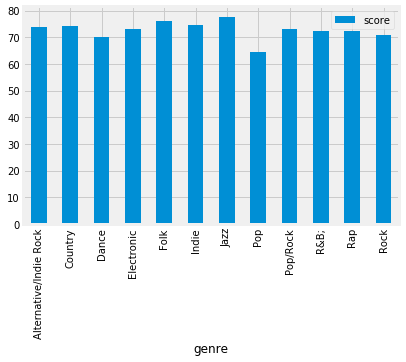

In [27]:
#Visualize it!
#add the .plot() function to our calculation
grouped.mean().plot(kind='bar')

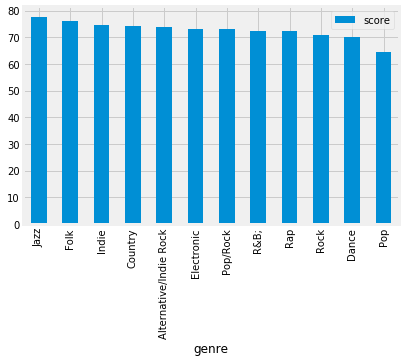

In [28]:
#sort the values to make it easier to see
grouped.mean().sort_values(by='score',ascending=False).plot(kind='bar')

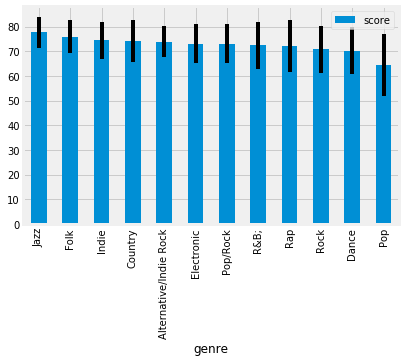

In [29]:
#Add error bars to indicate variance
grouped.mean().sort_values(by='score',ascending=False).plot(kind='bar', yerr=grouped.std())

## Functions inside of Pandas!

What about that awesome text column? What can we do with that? We can do anything with it, by applying our own function to it.

Let's do something simple and add a word count column, and compare accross genres. Perhaps reviews are more or less verbose depending on genre.

In [30]:
##define a function that counts words
##we've seen this before

def count_words(text):
    return len(text.split())

In [31]:
#create a copy of our dataframe so we don't muck up the original
df_wc = df.copy()

##create a new column in our df and apply our function, to the 'body' column


df_wc['word_count'] = df_wc['body'].apply(count_words)

#view our dataframe
df_wc

,album,artist,genre,release_date,critic,score,body,word_count
0,Don't Panic,All Time Low,Pop/Rock,2012-10-09 00:00:00,Kerrang!,74.0,While For Baltimore proves they can still writ...,38
1,Fear and Saturday Night,Ryan Bingham,Country,2015-01-20 00:00:00,Uncut,70.0,There's nothing fake about the purgatorial nar...,24
2,The Way I'm Livin',Lee Ann Womack,Country,2014-09-23 00:00:00,Q Magazine,84.0,All life's disastrous lows are here on a caree...,13
3,Doris,Earl Sweatshirt,Rap,2013-08-20 00:00:00,Pitchfork,82.0,"With Doris, Odd Future’s Odysseus is finally b...",16
4,Giraffe,Echoboy,Rock,2003-02-25 00:00:00,AllMusic,71.0,Though Giraffe is definitely Echoboy's most im...,44
5,Weathervanes,Freelance Whales,Indie,2010-04-13 00:00:00,Q Magazine,68.0,Fans of Owl City and The Postal Service will r...,31
6,Build a Rocket Boys!,Elbow,Pop/Rock,2011-04-12 00:00:00,Delusions of Adequacy,82.0,"Whereas previous Elbow records set a mood, Bui...",33
7,Ambivalence Avenue,Bibio,Indie,2009-06-23 00:00:00,Q Magazine,78.0,His remarkable Warp debut follows a series of ...,19
8,Wavvves,Wavves,Indie,2009-03-17 00:00:00,PopMatters,68.0,"There’s an energy coursing through this, and r...",36
9,Peachtree Road,Elton John,Rock,2004-11-09 00:00:00,MelD.,70.0,Classic. Songs filled with soul. Lyrics refres...,58


In [49]:
###Exercise 2a: Summarize the word_count column
df_wc["word_count"].describe()

count    5001.000000
mean       30.907219
std        31.876979
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max       566.000000
Name: word_count, dtype: float64

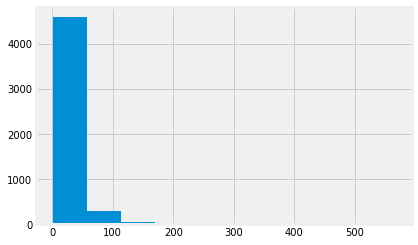

In [46]:
###Exercise 2b: Visualize the word_count column
df_wc["word_count"].hist()

In [51]:
###Exercise 2c: Compare word counts by genre
grouped_wc = df_wc.groupby('genre')
grouped_wc
grouped_wc["word_count"].mean().sort_values(ascending=False)

genre
Pop                       37.382550
Pop/Rock                  33.170929
Country                   32.992857
Rock                      32.465665
Rap                       32.093664
R&B;                      30.732143
Electronic                28.401559
Indie                     27.350673
Dance                     25.951220
Jazz                      25.578947
Alternative/Indie Rock    24.904762
Folk                      22.685714
Name: word_count, dtype: float64

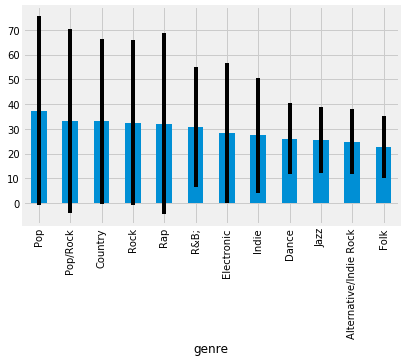

In [52]:
###Exercise 3: Visualize the average word count by genre, with error bars
grouped_wc["word_count"].mean().sort_values(ascending=False).plot(kind='bar', yerr=grouped_wc.std())

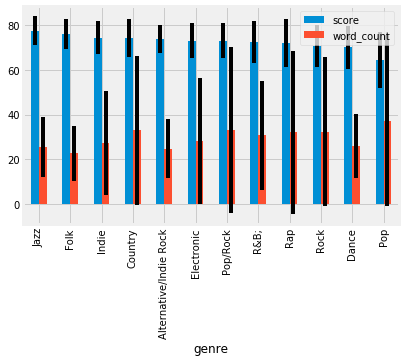

In [53]:
#Can can put both columns on the same graph
grouped_wc.mean().sort_values(by='score', ascending=False).plot(kind='bar', yerr=grouped_wc.std())

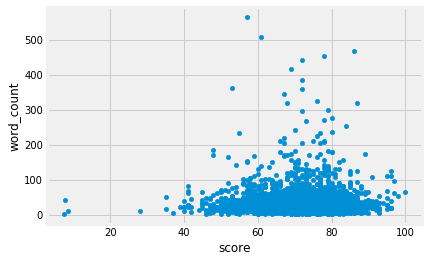

In [55]:
#is there a relationship between score and word_count?
df_wc.plot(kind='scatter', x = 'score', y = 'word_count')

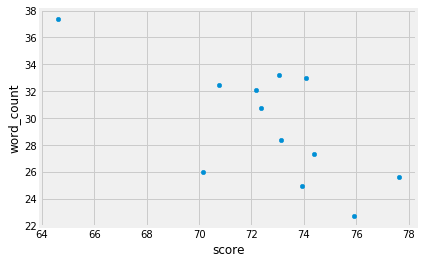

In [65]:
###Exercise 4: Visualize the relationship between average score and average word count, by genre
###Hint: use a scatter plot on the grouped dataframe
means = grouped_wc.mean()
means.plot(kind="scatter", x="score", y="word_count")


In [63]:
#Save the dataframe with the extra column to a csv file on your harddrive.
df_wc.to_csv("../data/BDHSI2016_music_reviews_with_wordcount.csv")

When done add your name to the notebook, save it, and upload it to Blackboard.